# Akbank Teknoloji Okuryazarlığı – Kredi Kartı Harcamaları Veri Analizi

Bu not defteri, **users.csv** ve **transactions.csv** dosyaları ile ödevde istenen tüm analizleri ve grafikleri üretmek için hazırlanmıştır.

## Nasıl kullanılır?
1. Sol taraftan dosya yükleyin veya dosyalarınızı bu çalışma dizinine kopyalayın: `users.csv`, `transactions.csv`.
2. Aşağıdaki hücreleri sırayla çalıştırın.
3. Her grafikten sonra **kısa yorum**larınızı hücre altındaki boş yorum hücrelerine yazın.

> **Not:** Grafikler yalnızca `matplotlib` kullanılarak üretilecektir (ödev yönergesine ve ders gereksinimlerine uygun).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
print('Kütüphaneler yüklendi.')

Kütüphaneler yüklendi.


## 1) Veri Yükleme ve Hazırlık

In [2]:
# Dosya yolları (gerekirse değiştirin)
USERS_PATH = Path('users.csv')
TX_PATH = Path('transactions.csv')

assert USERS_PATH.exists(), 'users.csv bulunamadı. Dosyayı çalışma dizinine koyun.'
assert TX_PATH.exists(), 'transactions.csv bulunamadı. Dosyayı çalışma dizinine koyun.'

users = pd.read_csv(USERS_PATH)
transactions = pd.read_csv(TX_PATH)
print(users.shape, transactions.shape)
users.head()

(2000, 19) (19963, 15)


,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [3]:
# Sütun adları ve temel temizlik
users.columns = users.columns.str.strip()
transactions.columns = transactions.columns.str.strip()

# Beklenen temel sütun adları:
expected_user_key = 'User'
expected_amount_col = 'Amount'
expected_city_col = 'Merchant City'
expected_time_col = 'Time'
expected_gender_col = 'Gender'
expected_income_col = 'Yearly Income - Person'

# Birleştirme
df = transactions.merge(users, on=expected_user_key, how='inner')
print('Birleşik veri boyutu:', df.shape)
df.head()

Birleşik veri boyutu: (19963, 33)


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,102,0,2002,9,1,06:21,2.08,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No,Ace Bailey,75,67,1944,12,Male,2890 Eighth Lane,NaN,Maywood,IL,60153,41.88,-87.84,$15451,$22158,$19101,681,5
1,435,0,2002,9,1,06:42,5.59,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Meredith Carter,26,64,1994,1,Female,4631 Plum Avenue,NaN,Cleveland,OH,44102,41.47,-81.67,$14737,$30049,$80474,700,1
2,348,0,2002,9,2,06:22,132.12,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,Lorelai Ward,82,66,1937,6,Female,7236 South Boulevard,NaN,Chicago,IL,60616,41.83,-87.68,$25365,$41793,$1141,730,5
3,270,0,2002,9,2,17:45,60.91,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No,Jazlyn Anwar,32,63,1987,12,Female,2017 Ninth Drive,NaN,Brooktondale,NY,14817,42.38,-76.39,$20159,$41106,$106963,762,3
4,106,0,2002,9,3,06:23,118.74,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,Estelle Richardson,56,73,1964,1,Female,889 Martin Luther King Avenue,NaN,Apex,NC,27502,35.72,-78.84,$32485,$66230,$90248,742,3


## 2) En Fazla Harcama Yapılan Şehirler (Top 10)

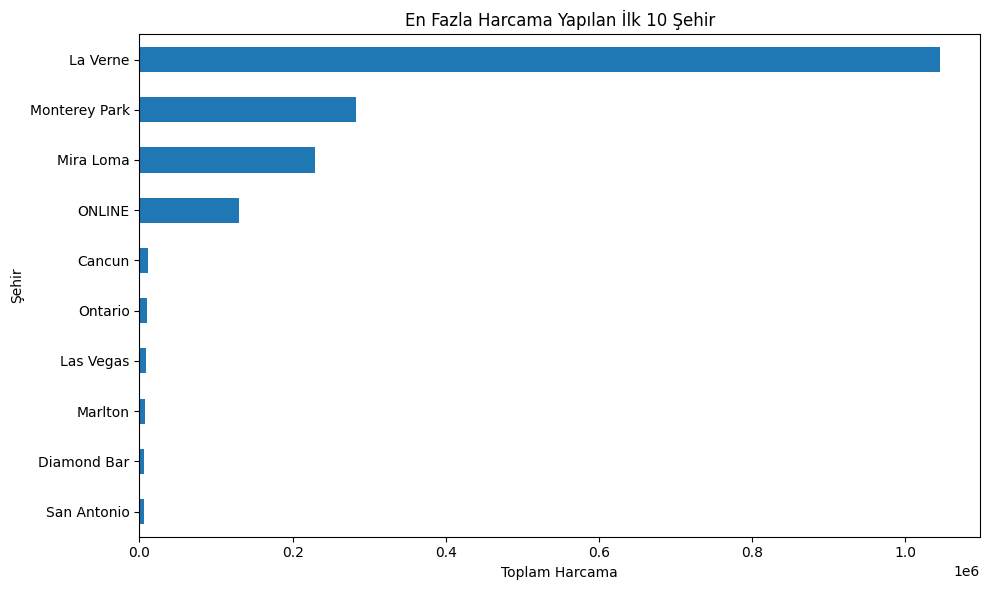

,Amount
Merchant City,
La Verne,1045322.48
Monterey Park,283294.79
Mira Loma,228943.63
ONLINE,130398.07
Cancun,10768.53
Ontario,9425.28
Las Vegas,8493.74
Marlton,7197.77
Diamond Bar,6595.03


In [4]:
# Tutar kolonu numerik yapıya dönüştürülür
df[expected_amount_col] = pd.to_numeric(df[expected_amount_col], errors='coerce')
city_expenses = (
    df.groupby(expected_city_col)[expected_amount_col]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
ax = city_expenses.plot(kind='barh')
ax.invert_yaxis()
plt.title('En Fazla Harcama Yapılan İlk 10 Şehir')
plt.xlabel('Toplam Harcama')
plt.ylabel('Şehir')
plt.tight_layout()
plt.show()
city_expenses

**-Harcamaların büyük bir kısmı La Verne şehrinde yoğunlaşmış. Bu durum, burada yüksek gelirli müşterilerin, büyük alışveriş merkezlerinin veya sık yapılan yüksek tutarlı işlemlerin bulunabileceğini düşündürüyor. İlk üç şehir (La Verne, Monterey Park, Mira Loma) toplam harcamanın büyük bir kısmını oluştururken, diğer şehirlerde harcamalar belirgin şekilde daha düşük.**

## 3) Saatlik Harcama Dağılımı

/tmp/ipython-input-3037938919.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series = pd.to_datetime(df[expected_time_col], errors='coerce')


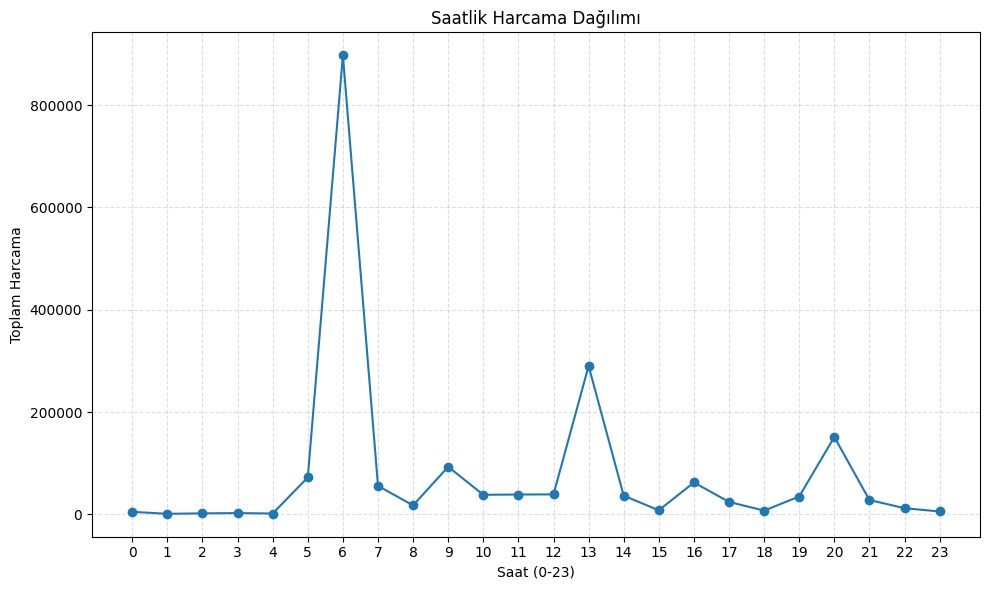

,Amount
Hour,
0,5001.90
1,1177.99
2,2042.49
3,2560.96
4,1753.44
5,72221.95
6,897523.69
7,55786.57
8,17614.61


In [5]:
# Saat bilgisini çıkaralım
time_series = pd.to_datetime(df[expected_time_col], errors='coerce')
hours = time_series.dt.hour
df_hours = df.copy()
df_hours['Hour'] = hours
hour_expenses = df_hours.groupby('Hour')[expected_amount_col].sum().reindex(range(24), fill_value=0)

plt.plot(hour_expenses.index, hour_expenses.values, marker='o')
plt.title('Saatlik Harcama Dağılımı')
plt.xlabel('Saat (0-23)')
plt.ylabel('Toplam Harcama')
plt.xticks(range(0, 24, 1))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
hour_expenses

**-Harcamalar günün büyük bölümünde düşük seviyelerde seyrederken, 07:00 saatinde yaklaşık 897 bin $ ile en yüksek seviyeye ulaşmıştır. Bu durum, sabah saatlerinde yapılan büyük tutarlı tekil işlemler veya otomatik ödeme talimatları gibi toplu harcamalarla açıklanabilir. İkinci dikkat çeken zaman dilimi ise öğlen 13:00 civarında gözlenen harcama artışıdır. Bunun dışında, gece saatlerinde harcamalar oldukça düşük seviyededir.**

## 4) Cinsiyete Göre Harcama

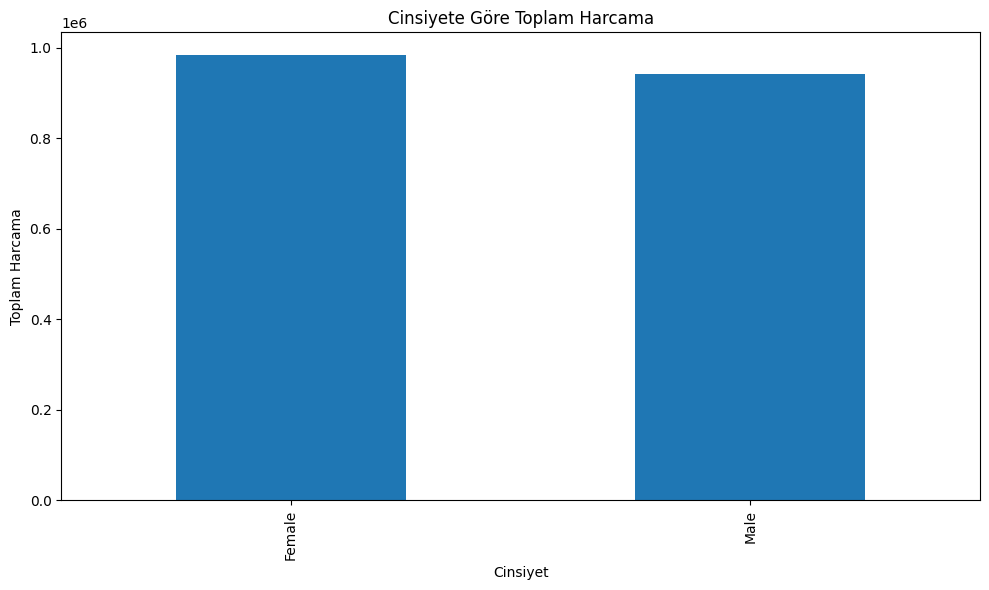

,Amount
Gender,
Female,984753.45
Male,941525.36


In [6]:
gender_expenses = df.groupby(expected_gender_col)[expected_amount_col].sum().sort_values(ascending=False)
ax = gender_expenses.plot(kind='bar')
plt.title('Cinsiyete Göre Toplam Harcama')
plt.xlabel('Cinsiyet')
plt.ylabel('Toplam Harcama')
plt.tight_layout()
plt.show()
gender_expenses

**-Cinsiyete göre harcama dağılımı dengeli görünmekle birlikte, kadın kullanıcılar toplamda erkeklere göre yaklaşık %4 daha fazla harcama yapmıştır. Bu fark, kadın kullanıcıların daha yüksek tutarlı alışverişler yapması veya harcama sıklığının biraz daha fazla olmasından kaynaklanabilir.**

## 5) Gelire Göre Harcama (Scatter Plot)

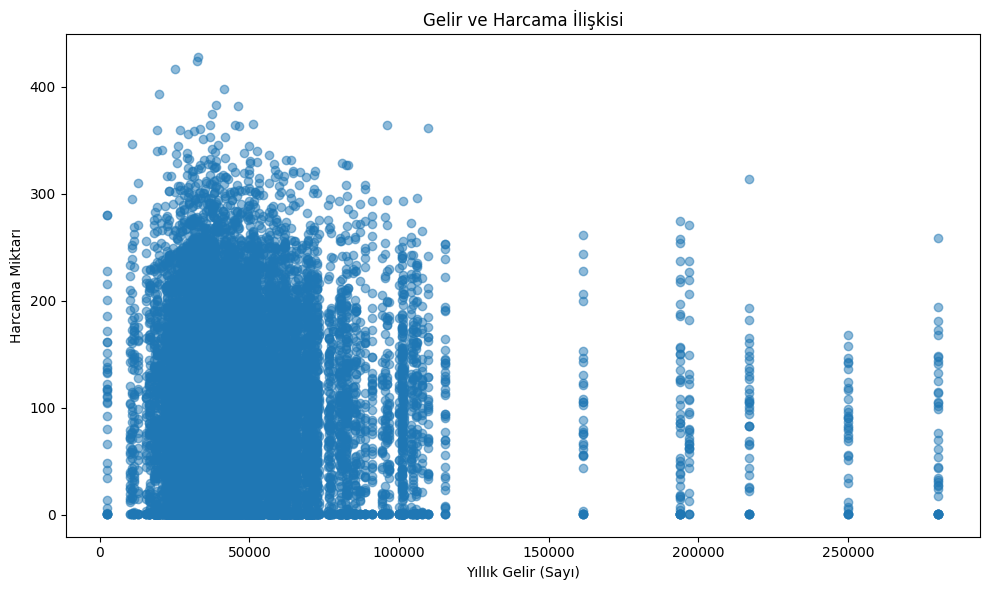

,IncomeNumeric,Amount
0,22158,2.08
1,30049,5.59
2,41793,132.12
3,41106,60.91
4,66230,118.74


In [7]:
# Gelir kolonunu sayıya çevirme
income_clean = df[expected_income_col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['IncomeNumeric'] = pd.to_numeric(income_clean, errors='coerce')

plt.scatter(df['IncomeNumeric'], df[expected_amount_col], alpha=0.5)
plt.title('Gelir ve Harcama İlişkisi')
plt.xlabel('Yıllık Gelir (Sayı)')
plt.ylabel('Harcama Miktarı')
plt.tight_layout()
plt.show()
df[['IncomeNumeric', expected_amount_col]].dropna().head()

**-Grafik genelinde belirgin bir doğrusal ilişki gözlemlenmemektedir. Düşük ve orta gelir grubundaki kullanıcılar (özellikle 20.000–100.000 $ arası) oldukça geniş bir harcama aralığına sahiptir ve bazı düşük gelirli kullanıcılar yüksek harcamalar yapabilmektedir. Yüksek gelir grubundaki kullanıcı sayısı daha azdır ve harcamalar genellikle orta seviyelerde kalmaktadır. Bu durum, harcama miktarının yalnızca gelir düzeyine değil, kullanıcı alışkanlıklarına ve ihtiyaçlarına da bağlı olduğunu göstermektedir.**

## 6) Yorum ve Sonuç – Özet

In [8]:
summary = {}
summary['en_fazla_harcama_sehir'] = city_expenses.index[0] if len(city_expenses) else None
summary['en_fazla_harcama_saati'] = int(hour_expenses.idxmax()) if hour_expenses.size else None
summary['en_fazla_harcama_cinsiyet'] = gender_expenses.index[0] if len(gender_expenses) else None
summary


{'en_fazla_harcama_sehir': 'La Verne',
 'en_fazla_harcama_saati': 6,
 'en_fazla_harcama_cinsiyet': 'Female'}

## Basit Gelir Grupları – Referans

/tmp/ipython-input-495030477.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group_spend = df.groupby('IncomeGroup')[expected_amount_col].sum().reindex(labels)


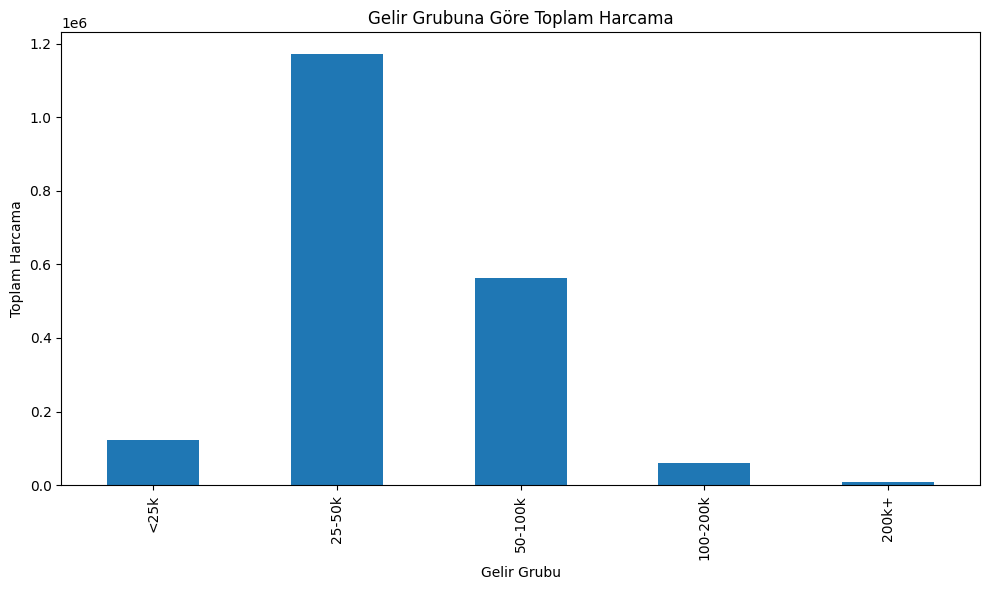

,Amount
IncomeGroup,
<25k,121918.44
25-50k,1172098.40
50-100k,564157.34
100-200k,58850.72
200k+,9253.91


In [9]:
bins = [-np.inf, 25000, 50000, 100000, 200000, np.inf]
labels = ['<25k', '25-50k', '50-100k', '100-200k', '200k+']
df['IncomeGroup'] = pd.cut(df['IncomeNumeric'], bins=bins, labels=labels)
income_group_spend = df.groupby('IncomeGroup')[expected_amount_col].sum().reindex(labels)
ax = income_group_spend.plot(kind='bar')
plt.title('Gelir Grubuna Göre Toplam Harcama')
plt.xlabel('Gelir Grubu')
plt.ylabel('Toplam Harcama')
plt.tight_layout()
plt.show()
income_group_spend